#Informasi singkat
Nama : Rizka Aji GG

Batch : 01

#Dataset
Dataset yang menjadi rujukan adalah dataset yang berisikan informasi berkaitan dengan kickstart project dimana terdapat beberapa kategori, besaran uang yang dibutuhkan, kapan waktu awal dan akhir penggalangan dibuat, serta kejelasan status yang didapat.

#Objectives



*   Mampu memuat melakukan analisis sederhana
*   Mampu menghitung central tendency,korelasi, dan covarian
*   Mampu melakukan perhitungan dengan beberapa pengujian 
*   Mampu membuat membuat Hipotesis








#Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

#Data Preprocess

loading data set project 2018

In [2]:
df_raw = pd.read_csv('/content/ks-projects-201801.csv',error_bad_lines=False)
print(df_raw.shape)
df_raw

(34095, 15)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0.0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15.0,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1.0,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14.0,US,1283.00,1283.00,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34090,1173028570,Change Your Mind - hit song inspires new book ...,Publishing,Publishing,USD,2015-06-26,15000.0,2015-05-26 22:40:28,70770.55,successful,444.0,US,70770.55,70770.55,15000.00
34091,1173028666,Danilo Gabrielli: Clothing to Make Women Feel ...,Fashion,Fashion,USD,2013-08-09,40000.0,2013-07-10 16:31:57,600.00,failed,2.0,US,600.00,600.00,40000.00
34092,117302953,Princess Cut - A Christian Romance Movie,Romance,Film & Video,USD,2014-08-20,10000.0,2014-08-05 20:59:36,12700.00,successful,171.0,US,12700.00,12700.00,10000.00
34093,1173030295,LOCAL 180° Family Farm,Farms,Food,USD,2017-02-20,10000.0,2017-02-06 19:57:17,10646.77,successful,163.0,US,1625.00,10646.77,10000.00


Menunjukan informasi mengenai jenis data yang ada

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34095 entries, 0 to 34094
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                34095 non-null  int64  
 1   name              34095 non-null  object 
 2   category          34094 non-null  object 
 3   main_category     34094 non-null  object 
 4   currency          34094 non-null  object 
 5   deadline          34094 non-null  object 
 6   goal              34094 non-null  float64
 7   launched          34094 non-null  object 
 8   pledged           34094 non-null  float64
 9   state             34094 non-null  object 
 10  backers           34094 non-null  float64
 11  country           34094 non-null  object 
 12  usd pledged       33758 non-null  float64
 13  usd_pledged_real  34094 non-null  float64
 14  usd_goal_real     34094 non-null  float64
dtypes: float64(6), int64(1), object(8)
memory usage: 3.9+ MB


Menampilkan histogram berdasarkan USD pledged real yang merupakan objek pengamatan

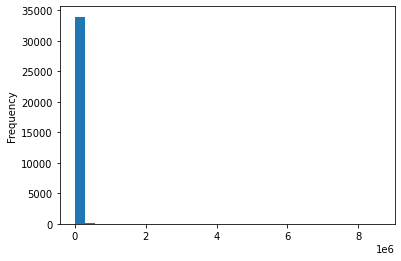

In [4]:
df_raw['usd_pledged_real'].plot.hist(bins=30, density=False)

#Filtering

melakukan filtering untuk memperjelas objek yang diamati

In [5]:
df_filt = df_raw[df_raw['usd_pledged_real']<=50000]

histogram hasil filtering dengan nilai dibaha sama dengan 50000

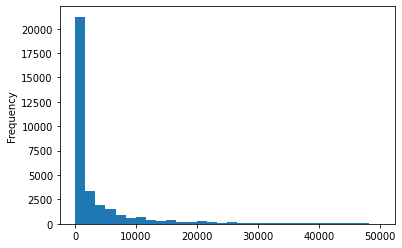

In [6]:
df_filt['usd_pledged_real'].plot.hist(bins=30, density=False)

Melakukan pengamatan lain dengan objek Main Category

In [7]:
df_filt.groupby('main_category').count()

,ID,name,category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
main_category,,,,,,,,,,,,,,
Art,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536,2536
Comics,968,968,968,968,968,968,968,968,968,968,968,968,968,968
Crafts,821,821,821,821,821,821,821,821,821,821,821,821,821,821
Dance,343,343,343,343,343,343,343,343,343,343,343,343,343,343
Design,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
Fashion,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976,1976
Film & Video,5640,5640,5640,5640,5640,5640,5640,5640,5640,5640,5640,5574,5640,5640
Food,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135,2135
Games,2965,2965,2965,2965,2965,2965,2965,2965,2965,2965,2965,2964,2965,2965


Melakukan grouping dengan main category dengan melakukan perhitungan kumulatif sum untuk mengetahui masih bisa digunakan atau tidak sebagai objek dengan perhitungan nilai kumulatif mendekati nilai kritikal 95% atau 0.95

In [8]:
df_grp_MC = df_filt.groupby('main_category').count().reset_index()[['main_category','usd_pledged_real']].sort_values('usd_pledged_real',ascending=False)
df_grp_MC['MC_count']=df_grp_MC['usd_pledged_real'].cumsum()
df_grp_MC['csum']=df_grp_MC['MC_count']/df_grp_MC['MC_count'].max()
df_grp_MC = df_grp_MC[df_grp_MC['csum']<=0.95]

Tampilan tabel didasari perhitungan dan grouping sebelumnya

In [9]:
print(df_grp_MC.shape)
df_grp_MC

(11, 4)


,main_category,usd_pledged_real,MC_count,csum
6,Film & Video,5640,5640,0.170192
10,Music,4598,10238,0.308941
12,Publishing,3562,13800,0.416428
8,Games,2965,16765,0.505899
13,Technology,2733,19498,0.588370
0,Art,2536,22034,0.664896
4,Design,2482,24516,0.739793
7,Food,2135,26651,0.804219
5,Fashion,1976,28627,0.863846
14,Theater,1001,29628,0.894052


Memasukan hasil grouping pada tabel filter sebelumnya

In [10]:
df_filt = df_filt[df_filt['main_category'].isin(df_grp_MC['main_category'])]

jumlah ror dan table setelah grouping

In [11]:
df_filt.shape

(30612, 15)

#Central Tendency

Mencari central tendency dengan hasil rata rata 3610.892204 dan standar deviasi 7163.116874 

In [12]:
print(df_filt['usd_pledged_real'].describe())
df_filt['usd_pledged_real'].describe()['mean']

count    30612.000000
mean      3642.370508
std       7260.284631
min          0.000000
25%         30.000000
50%        570.000000
75%       3562.250000
max      49949.280000
Name: usd_pledged_real, dtype: float64


3642.3705076440438

Garis bantu pengamatan pada objek USD pledged real yang dapat dilihat bahwa nilai mean lebih besar dibandingkan dengan nilai tengah sehingga skewness akan mengarah ke kiri menjauhi median.



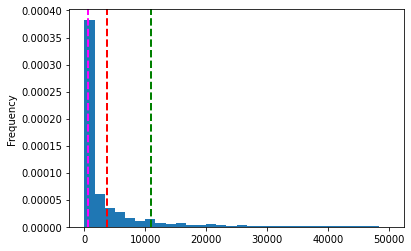

In [13]:
df_filt['usd_pledged_real'].plot.hist(bins=30,density=True)
plt.axvline(df_filt['usd_pledged_real'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['usd_pledged_real'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['usd_pledged_real'].describe()['mean']+df_filt['usd_pledged_real'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)

# Chi Square Test

Melakukan perhitungan Chi Square Test dengan masih menggunakan main category sebagai objek dan state yang dipilih untuk menunjukan hubungan

In [14]:
df_pivot=df_filt.groupby(['main_category','state']).count()[['goal','usd_pledged_real']].reset_index()

In [15]:
df_pivot

,main_category,state,goal,usd_pledged_real
0,Art,canceled,199,199
1,Art,failed,1296,1296
2,Art,live,15,15
3,Art,successful,1017,1017
4,Art,suspended,9,9
5,Design,canceled,377,377
6,Design,failed,1334,1334
7,Design,live,33,33
8,Design,successful,715,715
9,Design,suspended,23,23


Menjadikan main categori sebagai index dan state sebagai column untuk melihat nilai yang tertera pada column yang ada

In [16]:
df_pivot = df_pivot.pivot(index="main_category",columns="state", values='usd_pledged_real').fillna(0)

In [17]:
df_pivot

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,199.0,1296.0,15.0,1017.0,9.0,0.0
Design,377.0,1334.0,33.0,715.0,23.0,0.0
Fashion,233.0,1243.0,29.0,463.0,8.0,0.0
Film & Video,517.0,2950.0,31.0,2063.0,14.0,65.0
Food,178.0,1388.0,16.0,540.0,13.0,0.0
Games,538.0,1438.0,21.0,948.0,19.0,1.0
Music,290.0,1911.0,24.0,2165.0,9.0,199.0
Photography,80.0,595.0,5.0,299.0,5.0,0.0
Publishing,332.0,2087.0,30.0,1059.0,7.0,47.0


perhitungan chisquare dan p value dari objek diatas diman didapatkan bahwa tidak ada hubungan antara state dan main category sehingga H0 diterima karena nilai p value sama dengan 0

In [18]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 2536.60
p-value: 0.0000


#Correlation dan Variance

Melihat korelasi tiap objek yang ada

In [19]:
df_filt.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.004842,-0.001699,-0.014820,-0.007260,-0.012141,0.003535
goal,0.004842,1.000000,0.002385,-0.010549,-0.006398,-0.005706,0.905801
pledged,-0.001699,0.002385,1.000000,0.519954,0.628183,0.731151,-0.002901
backers,-0.014820,-0.010549,0.519954,1.000000,0.665516,0.740485,-0.008976
usd pledged,-0.007260,-0.006398,0.628183,0.665516,1.000000,0.897112,-0.003551
usd_pledged_real,-0.012141,-0.005706,0.731151,0.740485,0.897112,1.000000,-0.003086
usd_goal_real,0.003535,0.905801,-0.002901,-0.008976,-0.003551,-0.003086,1.000000


melakukan ploting scater untuk meilhat hubungan secara jelas dimana disi diambil usd pledge real dan goal sebagai objek

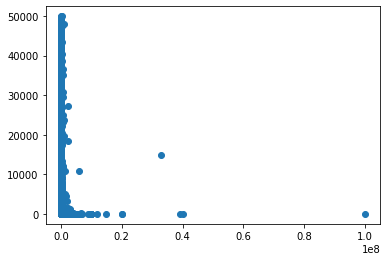

In [20]:
plt.scatter(df_filt['goal'],df_filt['usd_pledged_real'])

In [21]:
plot diatas menunjukan bahwa terdapat hubungan negatif antara kedua objek yang dipilih

SyntaxError: ignored

In [ ]:
df_filt['usd_pledged_real'].var()

Nilai covarian yang didapatkan dari objek usd pledge real

#Two sample test

Melaukan Two sample test didasari hubungan main category dengan usd pledge real

In [ ]:
df_MC=df_filt.groupby('main_category').agg({'usd_pledged_real':['count','mean']}).reset_index()
df_MC.columns = df_MC.columns.droplevel()

In [ ]:
df_MC.sort_values('count',ascending=False).head(5)

Mengambil sampel pada main category untuk usd pledge real dengan objek film dan video serta games

In [ ]:
df_FV = df_filt[df_filt['main_category']=='Film & Video']
df_Gem = df_filt[df_filt['main_category']=='Games']

Plot kedua objek yang dipilih sebelumnya

In [ ]:
df_FV['usd_pledged_real'].plot()


In [ ]:
df_Gem['usd_pledged_real'].plot()

Melakukan perhitungan sederhana dengan mencari nilai yang diperlukan dimana dicari STD, mean, kurtosis, Tstatistic dan pvalue

In [ ]:
np.random.seed(123)
nonMath =df_FV['usd_pledged_real']
math = df_Gem['usd_pledged_real']
print("Film & Video sample mean:" + str(nonMath.mean()))
print("Film & Video sample std:" + str(nonMath.std()))
print("Film & Video Kurtosis:" + str(nonMath.kurtosis()))
print("Games sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

# Kesimpulan
H0 = 0
H1 != 0,

hipotesis testing degan objek utama usd pledge real dan melihat keterkaitan dengan main category dimana dilakuka chi square test dan two sample test didapatkan bahwa keduanya tidak meiliki hubungan. Hal ini dapat dilihat dengan nilai p-value yang sama dengan 0 dimana batas standar untuk menrima adanya hubungan adalah 0,05 sehingga H0 diterima dan H1 ditolak. hal yang dapat dilihat pula adalah kurtosis yang cenderung sangat tajam sehingga dapat disimpulkan tidak meratanya distribusi yang ada pada usd pledge real. 